1. Numerical Differentiation

Forward/Backward/Central vs. Truth

Objective: Compare finite-difference schemes and empirically recover error orders.

Core Concept: Forward, backward, and central differences; error order.

Task: Implement derivatives using forward, backward, central schemes. Sweep step sizes and
compute error against analytic derivative. Plot error vs. h on log–log scale and confirm orders.

Learning Outcome: Understand stencil accuracy and confirm error orders.

In [148]:
import numpy as np
import matplotlib.pyplot as plt

Forward Difference Approximation

$f'(x)=\frac{f(x+h)-f(x)}{h}+O(h)$

In [149]:
def forward_difference(f, x, h):
    """Compute the forward difference approximation of the derivative."""
    return (f(x + h) - f(x)) / h

forward_difference.__name__ = "forward difference"

Backward Difference Approximation

$f'(x)=\frac{f(x)-f(x-h)}{h} + O(h)$ 

In [150]:
def backward_difference(f, x, h):
    """Compute the backward difference approximation of the derivative."""
    return (f(x) - f(x - h)) / h

backward_difference.__name__ = "backwards difference"

Both forward and backward methods have errors on the order of $O(h)$. 

However, If we take the sumation of the two methods, we can reduce the error to the order $O(h^2)$, this is becasue all the odd power terms cancel eachother due to a sign difference.

Take the taylor expansion of $f(x+h)$,

$f(x+h)=f(x)+hf'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+ \dots$

And again of $f(x-h)$

$f(x+h)=f(x)-hf'(x)+\frac{h^2}{2!}f''(x)-\frac{h^3}{3!}f'''(x)+ \dots$

No we combine them to make the central difference equation, and as mentioned before, the odd error terms drop out.

$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+O(h^2)$



Now, below is the central difference method implemented as described above.

In [151]:
def central_difference(f, x, h):
    """Compute the central difference approximation of the derivative."""
    return (f(x+h) - f(x - h)) / (2*h)

central_difference.__name__ = "central difference"

Lets now compare the various methods, by way of observing their graphs aswell as their absolute error for a range of functions $f(x)$

In [152]:
ys=[]

In [153]:
#================= example usage ==============================
def diff_methods_vs_analytical(g, h):
    x = np.linspace(-20, 20, 4000)
    funcs = [forward_difference, backward_difference, central_difference]            
    labels = [f.__name__ for f in funcs]  


    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    for f, name in zip(funcs, labels):
        y = f(g, x, h)                                      # works if your f handles NumPy arrays
        ys.append(y)


In [154]:
def analytical_derivative(g, x):
    y = np.cos(x)/x + np.sin(x)*(-1/x**2)
    return y

In [155]:
#================= example usage ==============================
def diff_methods_vs_analytical(g, h):
    x = np.linspace(-20, 20, 4000)
    funcs = [forward_difference, backward_difference, central_difference]            
    labels = [f.__name__ for f in funcs]  
    
    # Initialize arrays to store results
    y_arrays = []  # Store y-values for each method
    error_arrays = []  # Store errors for each method
    
    # Get analytical derivative for comparison
    analytical_deriv = analytical_derivative(g, x)  # Assuming you have this function
    
    for f, name in zip(funcs, labels):
        y = f(g, x, h)  # Numerical derivative using current method
        y_arrays.append(y)  # Store y-values in separate array
        
        # Calculate error (absolute difference from analytical)
        error = np.abs(y - analytical_deriv)
        error_arrays.append(error)

        print(y_arrays)
        print(error_arrays)
        
        print(f"{name}: Max error = {np.max(error):.6f}, Mean error = {np.mean(error):.6f}")
    
    # Now you have:
    # y_arrays[0] = forward difference results
    # y_arrays[1] = backward difference results  
    # y_arrays[2] = central difference results
    # error_arrays[0], error_arrays[1], error_arrays[2] = corresponding errors
    
    return y_arrays, error_arrays, x, labels

# Usage example:
# y_results, errors, x_vals, method_names = diff_methods_vs_analytical(g, h=0.01)

# Access individual results:
# forward_diff_y = y_results[0]
# forward_diff_error = errors[0]
# central_diff_y = y_results[2] 
# etc.

In [156]:
def   g(x):
    return np.sin(x)/x

def p(x):
    return np.exp(-x**2)

In [157]:
y_results, errors, x_vals, method_names = diff_methods_vs_analytical(g, h=0.01)

[array([-0.01835881, -0.01883217, -0.01930412, ...,  0.01883229,
        0.01835893,  0.01788422])]
[array([0.00023707, 0.00023639, 0.00023568, ..., 0.00023616, 0.00023685,
       0.00023752])]
forward difference: Max error = 0.001667, Mean error = 0.000451
[array([-0.01835881, -0.01883217, -0.01930412, ...,  0.01883229,
        0.01835893,  0.01788422]), array([-0.01788422, -0.01835893, -0.01883229, ...,  0.01930412,
        0.01883217,  0.01835881])]
[array([0.00023707, 0.00023639, 0.00023568, ..., 0.00023616, 0.00023685,
       0.00023752]), array([0.00023752, 0.00023685, 0.00023616, ..., 0.00023568, 0.00023639,
       0.00023707])]
backwards difference: Max error = 0.001667, Mean error = 0.000451
[array([-0.01835881, -0.01883217, -0.01930412, ...,  0.01883229,
        0.01835893,  0.01788422]), array([-0.01788422, -0.01835893, -0.01883229, ...,  0.01930412,
        0.01883217,  0.01835881]), array([-0.01812152, -0.01859555, -0.01906821, ...,  0.01906821,
        0.01859555,  0.0181

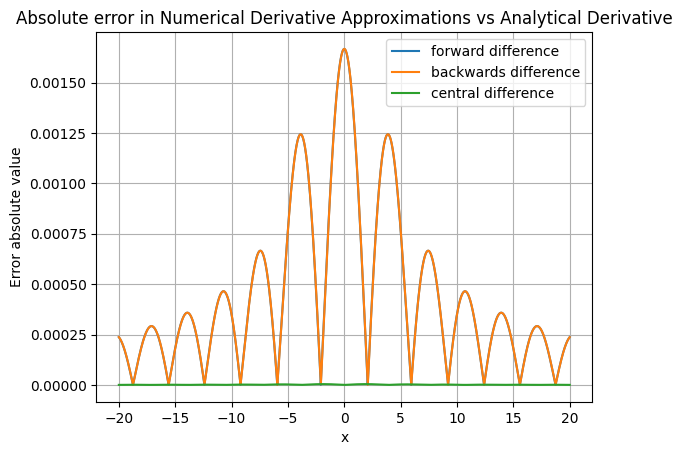

In [158]:
plt.plot(x_vals, errors[0], label=method_names[0])
plt.plot(x_vals, errors[1], label=method_names[1])
plt.plot(x_vals, errors[2], label=method_names[2])
plt.legend()
plt.title('Absolute error in Numerical Derivative Approximations vs Analytical Derivative')
plt.xlabel('x')
plt.ylabel('Error absolute value')
plt.grid()
plt.show()

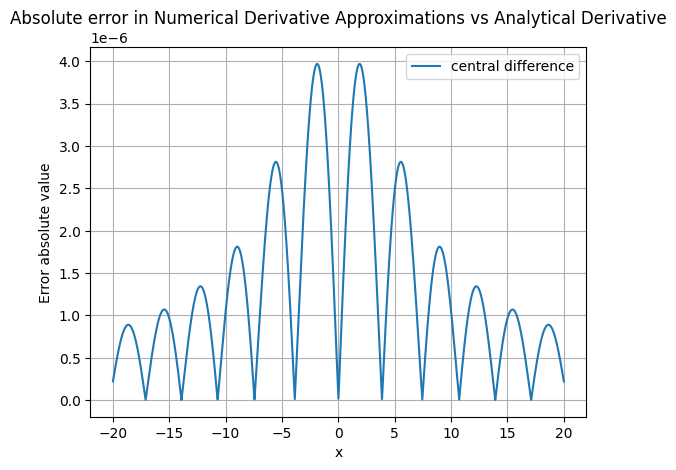

In [159]:
plt.plot(x_vals, errors[2], label=method_names[2])
plt.legend()
plt.title('Absolute error in Numerical Derivative Approximations vs Analytical Derivative')
plt.xlabel('x')
plt.ylabel('Error absolute value')
plt.grid()
plt.show()

[array([ 9.41642012e-173,  1.40391228e-172,  2.09270063e-172, ...,
       -1.40405242e-172, -9.41736062e-173, -6.31521396e-173])]
[array([0.01812174, 0.01859578, 0.01906844, ..., 0.01906844, 0.01859578,
       0.01812174])]
forward difference: Max error = 0.646902, Mean error = 0.115151
[array([ 9.41642012e-173,  1.40391228e-172,  2.09270063e-172, ...,
       -1.40405242e-172, -9.41736062e-173, -6.31521396e-173]), array([ 6.31521396e-173,  9.41736062e-173,  1.40405242e-172, ...,
       -2.09270063e-172, -1.40391228e-172, -9.41642012e-173])]
[array([0.01812174, 0.01859578, 0.01906844, ..., 0.01906844, 0.01859578,
       0.01812174]), array([0.01812174, 0.01859578, 0.01906844, ..., 0.01906844, 0.01859578,
       0.01812174])]
backwards difference: Max error = 0.646902, Mean error = 0.115151
[array([ 9.41642012e-173,  1.40391228e-172,  2.09270063e-172, ...,
       -1.40405242e-172, -9.41736062e-173, -6.31521396e-173]), array([ 6.31521396e-173,  9.41736062e-173,  1.40405242e-172, ...,
    

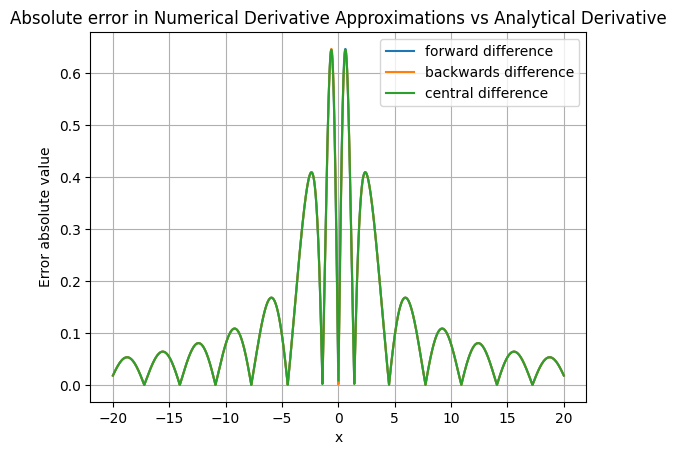

In [162]:
y_results1, errors1, x_vals1, method_names1 = diff_methods_vs_analytical(p, h=0.01)
plt.plot(x_vals1, errors1[0], label=method_names1[0])
plt.plot(x_vals1, errors1[1], label=method_names1[1])
plt.plot(x_vals1, errors1[2], label=method_names1[2])
plt.legend()
plt.title('Absolute error in Numerical Derivative Approximations vs Analytical Derivative')
plt.xlabel('x')
plt.ylabel('Error absolute value')
plt.grid()
plt.show()

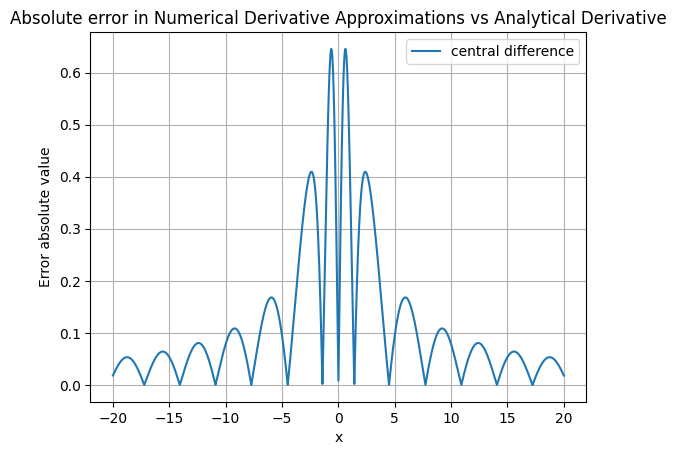

In [163]:
plt.plot(x_vals1, errors1[2], label=method_names1[2])
plt.legend()
plt.title('Absolute error in Numerical Derivative Approximations vs Analytical Derivative')
plt.xlabel('x')
plt.ylabel('Error absolute value')
plt.grid()
plt.show()